In [1]:
import data_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"I:\UTCS\Region\SAmerica.Hou\Expl_Proj\South_America\Users\_STS\aGame\ProductionData\AGame_Data_PA\welldaily\2020-07-01.csv")
df.describe()

,MerrickID,OilProduction,WaterProduction,GasProduction,GasInjection,WaterInjection,LinePressure,CasingPressure,SurfaceCasingPressure,InterCasingPressure,InjectionPressure,TubingPressure,ChokeSetting,ChokeSize,BDR_Oil,BDR_Gas
count,647391.000000,647391.000000,647391.000000,647391.000000,647391.000000,647391.000000,488606.000000,647391.000000,545033.000000,647386.000000,647391.000000,647391.000000,591070.000000,586170.000000,176017.000000,176017.000000
mean,32206.711814,18.819317,103.891009,219.643071,33.883893,0.255781,87.145763,279.944543,35.075962,24.587678,0.007951,198.268116,0.786575,2.868239,3.173033,164.571229
std,14991.349858,96.186093,373.679097,1082.612176,167.911715,28.098221,155.219414,546.291572,113.472443,159.331188,1.001641,1493.681395,15.609341,314.182607,39.582796,290.164949
min,2.000000,-444.040000,-120.830000,-267.320000,0.000000,0.000000,-83.000000,-765.000000,-19.890000,-96.500000,0.000000,-1233.000000,0.000000,0.000000,0.000000,0.000000
25%,21978.000000,0.000000,0.000000,2.650000,0.000000,0.000000,27.940000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,23.460000
50%,30717.000000,0.000000,1.610000,38.000000,0.000000,0.000000,58.480000,100.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,99.060000
75%,46147.000000,2.620000,23.810000,144.430000,0.000000,0.000000,84.410000,399.000000,3.000000,0.000000,0.000000,184.000000,0.750000,1.000000,0.240000,220.500000
max,55356.000000,3212.300000,13723.260000,39507.450000,72562.480000,5546.000000,3946.000000,262354.000000,1800.000000,5100.000000,198.000000,640840.000000,1350.000000,43200.000000,3166.280000,11157.150000


In [3]:
df.shape

(647391, 20)

In [4]:
df.columns

Index(['MerrickID', 'RecordDate', 'OilProduction', 'WaterProduction',
       'GasProduction', 'GasInjection', 'WaterInjection', 'LinePressure',
       'CasingPressure', 'SurfaceCasingPressure', 'InterCasingPressure',
       'InjectionPressure', 'TubingPressure', 'ChokeSetting', 'ChokeSize',
       'BDR_Oil', 'BDR_Gas', 'CommentsGeneral', 'ProducingMethod',
       'ProducingStatus'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647391 entries, 0 to 647390
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MerrickID              647391 non-null  int64  
 1   RecordDate             647391 non-null  object 
 2   OilProduction          647391 non-null  float64
 3   WaterProduction        647391 non-null  float64
 4   GasProduction          647391 non-null  float64
 5   GasInjection           647391 non-null  float64
 6   WaterInjection         647391 non-null  float64
 7   LinePressure           488606 non-null  float64
 8   CasingPressure         647391 non-null  float64
 9   SurfaceCasingPressure  545033 non-null  float64
 10  InterCasingPressure    647386 non-null  float64
 11  InjectionPressure      647391 non-null  float64
 12  TubingPressure         647391 non-null  float64
 13  ChokeSetting           591070 non-null  float64
 14  ChokeSize              586170 non-nu

In [6]:
df["RecordDate"] = pd.to_datetime(df["RecordDate"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647391 entries, 0 to 647390
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   MerrickID              647391 non-null  int64         
 1   RecordDate             647391 non-null  datetime64[ns]
 2   OilProduction          647391 non-null  float64       
 3   WaterProduction        647391 non-null  float64       
 4   GasProduction          647391 non-null  float64       
 5   GasInjection           647391 non-null  float64       
 6   WaterInjection         647391 non-null  float64       
 7   LinePressure           488606 non-null  float64       
 8   CasingPressure         647391 non-null  float64       
 9   SurfaceCasingPressure  545033 non-null  float64       
 10  InterCasingPressure    647386 non-null  float64       
 11  InjectionPressure      647391 non-null  float64       
 12  TubingPressure         647391 non-null  floa

to see statistics on non-numerical features, one has to expliclity indicate data types of interest in the include parameter. 

In [29]:
Merrick = df["MerrickID"].unique()
len(Merrick)

21434

In [14]:
df.describe(include=["object","bool"])

,CommentsGeneral,ProducingMethod,ProducingStatus
count,133757,647391,647391
unique,23827,43,23
top,Sifbu,Plunger Lift,Producing Gas
freq,2853,146883,368922


In [17]:
df["ProducingMethod"].value_counts(normalize=True)

Plunger Lift                                0.226885
Flowing                                     0.220380
Pumping unit                                0.193140
Gas lift                                    0.080378
ESP                                         0.063964
Foamer                                      0.044125
Pumping Unit-Electric                       0.040240
Intermitter                                 0.027972
Cap String                                  0.024803
Shut In                                     0.020105
GAPL                                        0.016165
PAGL                                        0.013573
Beam (capable)/Flowing (current)            0.008723
Flowing - Flowback                          0.004895
Plunger Lift /  Foamer                      0.003650
Unassigned                                  0.002576
Plunger Lift (capable)/Flowing (current)    0.002217
Gas Lift Poorboy                            0.001199
Gas Lift - GLV's w Packer                   0.

In [18]:
df["ProducingStatus"].value_counts(normalize=True)

Producing Gas                  0.569860
Producing Oil                  0.328072
Shut In Gas                    0.038830
Shut In Oil                    0.032433
Shut In Oil - Evaluated        0.008973
Shut In Gas – Evaluated        0.007855
Temporarily Abandoned          0.007756
Shut In Gas - Long Term        0.001733
Shut In Oil - Long Term        0.001690
Producing Oil with Gas Lift    0.000752
Sold                           0.000479
Unassigned                     0.000403
Permanently Abandoned          0.000287
SWD                            0.000239
Shut In Gas - Inactive         0.000144
Recompleted to Other Zone      0.000144
Waiting on Pipeline            0.000096
Injecting water                0.000096
Shut In Injection              0.000048
TBA - to be abandoned          0.000048
No Status                      0.000048
Permitted                      0.000014
House Gas Only                 0.000002
Name: ProducingStatus, dtype: float64

In [19]:
df[df["ProducingStatus"]=="Producing Gas"].describe()

,MerrickID,OilProduction,WaterProduction,GasProduction,GasInjection,WaterInjection,LinePressure,CasingPressure,SurfaceCasingPressure,InterCasingPressure,InjectionPressure,TubingPressure,ChokeSetting,ChokeSize,BDR_Oil,BDR_Gas
count,368922.000000,368922.000000,368922.000000,368922.000000,368922.000000,368922.0,347253.000000,368922.000000,322815.000000,368922.000000,368922.000000,368922.000000,360100.000000,360132.000000,143324.000000,143324.000000
mean,29746.060864,2.662422,15.813954,273.593413,21.148592,0.0,98.749400,348.722164,51.973533,33.867716,0.002607,227.142783,1.158914,4.351487,1.074628,173.952837
std,12792.757668,44.904749,165.348667,1379.128770,75.986052,0.0,170.517685,637.981301,135.358632,180.364705,0.235662,1297.037148,19.835860,400.801813,11.121733,251.522025
min,2.000000,-444.040000,-120.000000,0.000000,0.000000,0.0,-15.000000,-765.000000,-19.890000,-96.500000,0.000000,-1233.000000,0.000000,0.000000,0.000000,0.000000
25%,22875.000000,0.000000,0.000000,21.380000,0.000000,0.0,39.000000,65.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,37.890000
50%,27603.000000,0.000000,0.795000,72.580000,0.000000,0.0,61.250000,200.000000,0.000000,0.000000,0.000000,80.000000,0.380000,0.000000,0.000000,122.650000
75%,40562.000000,0.000000,5.830000,169.800000,0.000000,0.0,82.360000,470.000000,40.000000,0.000000,0.000000,220.000000,1.000000,1.000000,0.000000,231.220000
max,55342.000000,2831.980000,10841.460000,39507.450000,1217.000000,0.0,3946.000000,262354.000000,1800.000000,5100.000000,25.000000,425400.000000,1350.000000,43200.000000,348.580000,5864.950000


In [30]:
columns_to_show = ["OilProduction", "WaterProduction", "GasProduction", "GasInjection", "WaterInjection"]
wellsgroup = df.groupby(["MerrickID"]).describe()

In [31]:
wellsgroup.to_csv(r"I:\UTCS\Region\SAmerica.Hou\Expl_Proj\South_America\Users\_STS\aGame\srorta\Manipulated_Data\welldaily_summaries\2020-07-01_wellsgroupsummary.csv")
wellsgroup

OilProduction                                                   \
                  count      mean       std  min   25%   50%   75%   max   
MerrickID                                                                  
2                  31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   
3                  31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   
4                  31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   
10                 31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   
18                 31.0  0.545484  0.269714  0.0  0.62  0.62  0.62  1.24   
...                 ...       ...       ...  ...   ...   ...   ...   ...   
55343              31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   
55345              31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   
55354              31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   
55355              31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   
55356              31.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   

          WaterProduction        ... BDR_Oil     BDR_Gas                       \
                    count  mean  ...     75% max   count mean std min 25% 50%   
MerrickID                        ...                                            
2                    31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
3                    31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
4                    31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
10                   31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
18                   31.0  0.13  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
...                   ...   ...  ...     ...  ..     ...  ...  ..  ..  ..  ..   
55343                31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
55345                31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
55354                31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
55355                31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   
55356                31.0  0.00  ...     NaN NaN     0.0  NaN NaN NaN NaN NaN   

                   
          75% max  
MerrickID          
2         NaN NaN  
3         NaN NaN  
4         NaN NaN  
10        NaN NaN  
18        NaN NaN  
...        ..  ..  
55343     NaN NaN  
55345     NaN NaN  
55354     NaN NaN  
55355     NaN NaN  
55356     NaN NaN  

[21434 rows x 120 columns]

In [32]:
pd.crosstab(df["MerrickID"], df["ProducingStatus"])

ProducingStatus,House Gas Only,Injecting water,No Status,Permanently Abandoned,Permitted,Producing Gas,Producing Oil,Producing Oil with Gas Lift,Recompleted to Other Zone,SWD,...,Shut In Gas – Evaluated,Shut In Injection,Shut In Oil,Shut In Oil - Evaluated,Shut In Oil - Long Term,Sold,TBA - to be abandoned,Temporarily Abandoned,Unassigned,Waiting on Pipeline
MerrickID,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,31,0,0,0,0,0,0,0
18,0,0,0,0,0,0,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55343,0,0,0,0,0,0,0,0,0,0,...,0,0,31,0,0,0,0,0,0,0
55345,0,0,0,0,0,0,0,0,0,0,...,0,0,31,0,0,0,0,0,0,0
55354,0,0,0,0,0,0,0,0,0,0,...,0,0,31,0,0,0,0,0,0,0


In [36]:
pd.crosstab(df["MerrickID"], df["ProducingMethod"], margins = True)

ProducingMethod,Annular Gas Lift,Beam (capable)/Flowing (current),Cap String,ESP,Flowing,Flowing - Flowback,Flowing - Velocity String,Foamer,Foamer - with GLVs,GAPL,...,Plunger Lift / Foamer,Pumping Unit-Electric,Pumping unit,Salt Water Disposal,Shut In,Unassigned,Water Injection,_Unknown (1000040),_Unknown (1000077),All
MerrickID,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
3,0,0,0,0,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
4,0,0,0,0,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
10,0,0,0,0,0,0,0,0,0,0,...,0,0,31,0,0,0,0,0,0,31
18,0,0,0,0,0,0,0,0,0,0,...,0,0,31,0,0,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55345,0,0,0,0,0,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
55354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
55355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,31,0,0,0,0,31


In [9]:
pd.crosstab(df["ProducingStatus"],df["ProducingMethod"])

<AxesSubplot:xlabel='ProducingMethod', ylabel='count'>

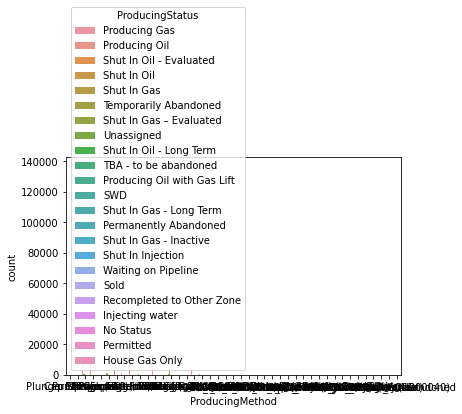

In [11]:
sns.countplot(x = "ProducingMethod", hue = "ProducingStatus", data=df)